In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('filtered_april_to_july.csv')

In [21]:
len(df)

105050

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105050 entries, 0 to 105049
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp_minute  105050 non-null  object 
 1   TP2               105050 non-null  float64
 2   TP3               105050 non-null  float64
 3   H1                105050 non-null  float64
 4   DV_pressure       105050 non-null  float64
 5   Reservoirs        105050 non-null  float64
 6   Oil_temperature   105050 non-null  float64
 7   Motor_current     105050 non-null  float64
 8   DV_eletric        105050 non-null  int64  
 9   COMP              105050 non-null  int64  
 10  Towers            105050 non-null  int64  
 11  MPG               105050 non-null  int64  
 12  LPS               105050 non-null  int64  
 13  Pressure_switch   105050 non-null  int64  
 14  Oil_level         105050 non-null  int64  
 15  Caudal_impulses   105050 non-null  int64  
dtypes: float64(7), int64

In [23]:
df.columns

Index(['timestamp_minute', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'DV_eletric', 'COMP', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

In [24]:
df['timestamp_minute'] = df['timestamp_minute'].apply(pd.to_datetime, format = "%Y-%m-%d %H:%M:%S")
print(f"Current type of timestamp is {type(df.timestamp_minute[0])}")

Current type of timestamp is <class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Add a Label Column

In [25]:
#Create a new column for target variable called status, indicate the equipment has deficiencies and need to be maintained
# status = 0; system ups and running
# status = 1; system downs and needs recovering
labeled_data = df.copy()
labeled_data['status'] = 0
print(labeled_data.head(5))

     timestamp_minute    TP2    TP3     H1  DV_pressure  Reservoirs  \
0 2020-04-17 00:00:00 -0.013  9.307  9.296       -0.024       9.306   
1 2020-04-17 00:01:00 -0.013  9.224  9.212       -0.023       9.222   
2 2020-04-17 00:02:00 -0.014  9.142  9.130       -0.023       9.141   
3 2020-04-17 00:03:00 -0.014  9.062  9.050       -0.024       9.062   
4 2020-04-17 00:04:00 -0.014  8.981  8.969       -0.025       8.982   

   Oil_temperature  Motor_current  DV_eletric  COMP  Towers  MPG  LPS  \
0           60.471          0.042           0     1       1    1    0   
1           59.300          0.042           0     1       1    1    0   
2           58.604          0.042           0     1       1    1    0   
3           58.075          0.042           0     1       1    1    0   
4           57.554          0.042           0     1       1    1    0   

   Pressure_switch  Oil_level  Caudal_impulses  status  
0                1          1                1       0  
1                1  

In [26]:
def to_datetime(xs):
  result = []
  format =  "%Y-%m-%d %H:%M:%S"
  for x in xs:
    result.append(pd.to_datetime(x, format = format))
  return result


failure_start_time = to_datetime(["2020-04-18 00:00:00", "2020-05-29 23:30:00", "2020-06-05 10:00:00", "2020-07-15 14:30:00"] )
failure_end_time   = to_datetime(["2020-04-18 23:59:00", "2020-05-30 06:00:00", "2020-06-07 14:30:00", "2020-07-15 19:00:00"] )

print(failure_start_time,"\n", failure_end_time[0].minute)

[Timestamp('2020-04-18 00:00:00'), Timestamp('2020-05-29 23:30:00'), Timestamp('2020-06-05 10:00:00'), Timestamp('2020-07-15 14:30:00')] 
 59


In [27]:
def in_between(x, start, end):

  start_con = x >= start
  end_con = x<= end

  inbetween_con = start_con and end_con
  if inbetween_con:
    return 1
  else:
    return 0

In [28]:
failure_indx = []
import numpy as np
for i, (start_time, end_time) in enumerate(zip(failure_start_time, failure_end_time)):
  mask = labeled_data['timestamp_minute'].apply(in_between, start = start_time, end = end_time)
  indx = labeled_data.index[mask == True].tolist()
  failure_indx += indx


print(f" Found {len(failure_indx)} samples representing failure state")

 Found 4960 samples representing failure state


In [29]:
#Set the sample with the timestamp falled between the failure time to 1
labeled_data['status'].iloc[failure_indx] = 1


C:\Users\Dell\AppData\Local\Temp\ipykernel_9896\3005102821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_data['status'].iloc[failure_indx] = 1


In [30]:
#Check the number of possitive samples
print(f"We have {labeled_data['status'][labeled_data['status']==1].count()} positve samples" )

We have 4960 positve samples


In [31]:
print(f"Example of Failure state \n {labeled_data[labeled_data['status']==1].head()}")

Example of Failure state 
         timestamp_minute    TP2    TP3     H1  DV_pressure  Reservoirs  \
1198 2020-04-18 00:00:00 -0.018  8.248  8.238       -0.024       8.248   
1199 2020-04-18 00:01:00 -0.018  8.248  8.238       -0.024       8.248   
1200 2020-04-18 00:02:00 -0.018  8.248  8.238       -0.024       8.248   
1201 2020-04-18 00:03:00 -0.018  8.248  8.238       -0.024       8.248   
1202 2020-04-18 00:04:00 -0.018  8.248  8.238       -0.024       8.248   

      Oil_temperature  Motor_current  DV_eletric  COMP  Towers  MPG  LPS  \
1198            49.45           0.04           0     1       1    1    0   
1199            49.45           0.04           0     1       1    1    0   
1200            49.45           0.04           0     1       1    1    0   
1201            49.45           0.04           0     1       1    1    0   
1202            49.45           0.04           0     1       1    1    0   

      Pressure_switch  Oil_level  Caudal_impulses  status  
1198       

In [32]:
labeled_data.head()

,timestamp_minute,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,DV_eletric,COMP,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,2020-04-17 00:00:00,-0.013,9.307,9.296,-0.024,9.306,60.471,0.042,0,1,1,1,0,1,1,1,0
1,2020-04-17 00:01:00,-0.013,9.224,9.212,-0.023,9.222,59.300,0.042,0,1,1,1,0,1,1,1,0
2,2020-04-17 00:02:00,-0.014,9.142,9.130,-0.023,9.141,58.604,0.042,0,1,1,1,0,1,1,1,0
3,2020-04-17 00:03:00,-0.014,9.062,9.050,-0.024,9.062,58.075,0.042,0,1,1,1,0,1,1,1,0
4,2020-04-17 00:04:00,-0.014,8.981,8.969,-0.025,8.982,57.554,0.042,0,1,1,1,0,1,1,1,0


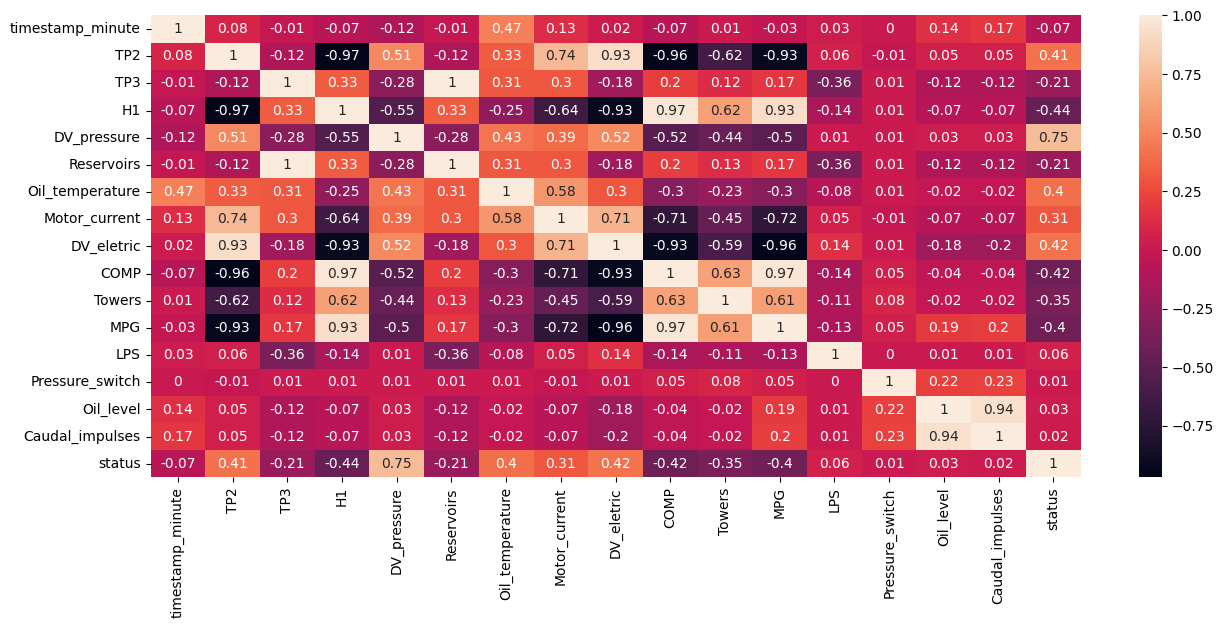

In [33]:
plt.figure(figsize=(15,6))
sns.heatmap(labeled_data.corr().round(2),annot=True)
plt.show()

     TP2    TP3     H1  DV_pressure  Reservoirs  Oil_temperature  \
0 -0.534  0.565  0.623       -0.289       0.563           -0.541   
1 -0.534  0.441  0.600       -0.287       0.438           -0.723   
2 -0.534  0.319  0.576       -0.287       0.316           -0.831   
3 -0.534  0.199  0.554       -0.289       0.198           -0.913   
4 -0.534  0.078  0.531       -0.291       0.079           -0.993   

   Motor_current  
0         -0.996  
1         -0.996  
2         -0.996  
3         -0.996  
4         -0.996  


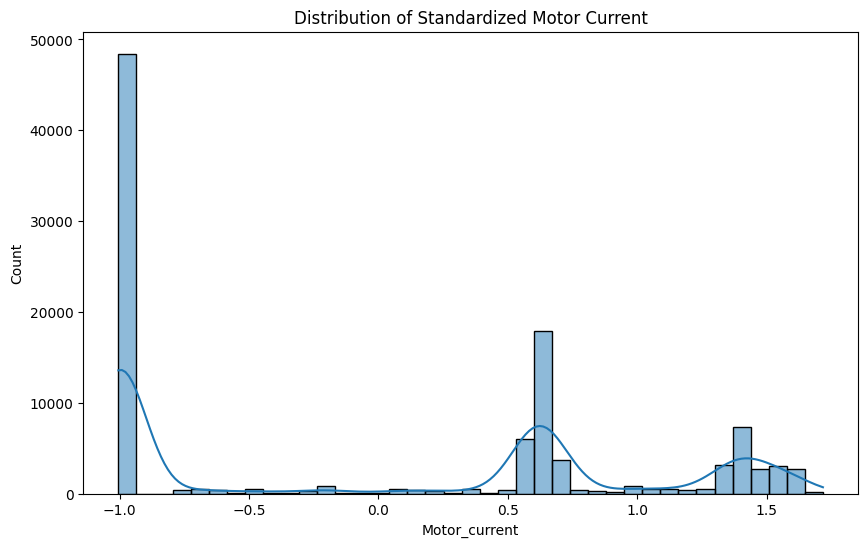

In [38]:
from sklearn.preprocessing import StandardScaler

# Selecting the sensor columns (example)
sensor_columns = ["TP2","TP3","H1","DV_pressure","Reservoirs","Oil_temperature","Motor_current"]

# Initializing the scaler
scaler = StandardScaler()

# Applying the scaler to the sensor columns
labeled_data[sensor_columns] = scaler.fit_transform(labeled_data[sensor_columns])

# Rounding the values in the sensor columns to 3 decimal places
labeled_data[sensor_columns] = labeled_data[sensor_columns].round(3)

# Checking the result of the normalization
print(labeled_data[sensor_columns].head())

# Visualizing the distribution of one of the standardized columns (e.g., Motor_current)
plt.figure(figsize=(10, 6))
sns.histplot(labeled_data['Motor_current'], kde=True)
plt.title("Distribution of Standardized Motor Current")
plt.show()


In [39]:
# Save the normalized data to a CSV file
labeled_data.to_csv("normalized_labeled_data.csv", index=False)


In [34]:
labeled_data.to_csv("labeled_data.csv", index=False)


In [35]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105050 entries, 0 to 105049
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   timestamp_minute  105050 non-null  datetime64[ns]
 1   TP2               105050 non-null  float64       
 2   TP3               105050 non-null  float64       
 3   H1                105050 non-null  float64       
 4   DV_pressure       105050 non-null  float64       
 5   Reservoirs        105050 non-null  float64       
 6   Oil_temperature   105050 non-null  float64       
 7   Motor_current     105050 non-null  float64       
 8   DV_eletric        105050 non-null  int64         
 9   COMP              105050 non-null  int64         
 10  Towers            105050 non-null  int64         
 11  MPG               105050 non-null  int64         
 12  LPS               105050 non-null  int64         
 13  Pressure_switch   105050 non-null  int64         
 14  Oil_